# Деревья решений
Шестаков А.В., Панов А.И. Майнор по анализу данных 12/04/2016

На прошлых занятиях мы рассматривали **линейные** модели классификации и регрессии. Деревья решений - совсем другая история. Во-первых, потому что их можно использовать и для регрессии и для классификации, а во-вторых линейностью там только слегка веет.

Формально, деревья решений можно представить в виде вложенного набора правил "Если - То", но гораздо нагляднее изображать их именно в виде дерева.

Например, дерево может выглядеть так:

<img src='https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/decision-tree-ex-tit.png'>

Или вот так:

<img src='http://scikit-learn.org/stable/_images/iris.svg'>

### Классификация с деревьями решений

Давайте попробуем вспомнить, как они стоятся. Рассмотрим следующий набор данных


| ID | Refund | Marital Status | Income | Cheat
|-
| 1 | Yes | Single | 125K | No
| 2 | No | Married | 100K | No
| 3 | No | Single | 70K | No
| 4 | Yes | Married | 120K | No
| 5 | No | Divorced | 95K | Yes
| 6 | No | Married | 60K | No
| 7 | Yes | Divorced | 220K | No
| 8 | No | Single | 85K | Yes
| 9 | No | Married | 75K | No
| 10 | No | Single | 90K | Yes


Имеем 3 признака и класс *Cheat*. Нужно выбрать признак, который наилучшим образом дифференцирует между классами. Посчитать это можно с помощью Impurity Measures и прироста информации:

**Impurity Measures: (меры неравенства\неопределенности)**
* Gini index $I(S) = 1 - \sum\limits_k (p_k)^2$
* Entropy  $I(S) = -\sum\limits_k p_k \log(p_k)$
* Missclassification error  $I(S) = 1 - \max\limits_k p_k$

$p_k$ - доля класса $k$ в узле дерева $S$

**Прирост информации: (насколько уменьшится неопределенность)** <br/>
$$ Gain(S, A) = I(S) - \sum\limits_v\frac{|S_v|}{|S|}\cdot I(S_v),$$ где $A$ - это некий атрибут, а $v$ - его значения

Например, для нашей таблицы:
$$I(S) = -(\frac{3}{10}\log(\frac{3}{10}) + \frac{7}{10}\log(\frac{7}{10})) = 0.61$$

Возьмем, например, атрибут *Marital Status*

$$Gain(S, \text{'Marital Status'}) = I(S) - (\frac{4}{10}\cdot I(S_{single}) + \frac{2}{10}\cdot I(S_{divorced}) + \frac{4}{10}\cdot I(S_{married})) =  0.14$$

Проделаем тоже самое для остальных атрибутов..

In [1]:
import math
import numpy as np

In [5]:
#Marital status
I_S = -(0.3*np.log2(3/10) + 0.7*np.log2(7/10))
I_single = -(1/2*np.log2(1/2) + 1/2*np.log2(1/2))
I_div = -(1/2*np.log2(1/2) + 1/2*np.log2(1/2))
I_married = -(1*np.log2(1))
Gain = I_S - (4/10*I_single + 2/10*I_div + 4/10*I_married)
print(I_S)
print(Gain)

0.881290899231
0.281290899231


In [ ]:
#Refund = 0,19 => for 1 branch chose is Marital Status
I_S = -(0.3*np.log2(3/10) + 0.7*np.log2(7/10))
I_yes = -()

In [22]:
## Your code here

In [6]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)#обучение классификатора

In [15]:
print(clf.predict([[0.5, 0.5]]))
print(clf.predict([[0.51, 0.51]]))#классификация нового объекта

[0]
[1]


In [21]:
print(clf.predict_proba([[0.50000001, 0.50000001]]))

[[ 1.  0.]]


In [22]:
print(clf.predict_proba([[0.5000001, 0.5000001]]))

[[ 0.  1.]]


In [11]:
clf.predict_proba([0.51, 0.51])#первое число - вероятность 1 класса, 2 число - вероятность 2 класса

C:\Users\Настя\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.,  1.]])

In [23]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

### Как посмотреть на деревья?

In [38]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        return print(left, right) 
        def recurse(node):
            if (threshold[node] != -2):
                if (left[node] != -1):
                    print(' '*counter + 'if(' + features[node] + '>' + str(threshold[node]) + '){')
                    recurse(left[node], counter + 2)
                    print(' '*counter + '}else{')
                if (right[node] != -1):
                    print(' '*counter + 'if(' + features[node] + '>' + str(threshold[node]) + '){')
                    recurse(right[node], counter + 2)
                    print(' '*counter + '}')
            else:
                print(' '*counter + 'return' + str(value[node]))
        recurse(0,0)

        ### Your recursive funtion of print


In [33]:
get_code(clf, iris.feature_names)

[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1] [ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]


In [36]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Затем можно с помощью [Graphviz](http://www.graphviz.org/Download..php) создать pdf или другой поддерживаемый тип файла: `dot -Tpdf iris.dot -o iris.pdf`

In [35]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")

ImportError: No module named 'pydot'

In [8]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydot' is not defined

In [9]:
clf.predict(iris.data[:1, :])

array([0])

In [10]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

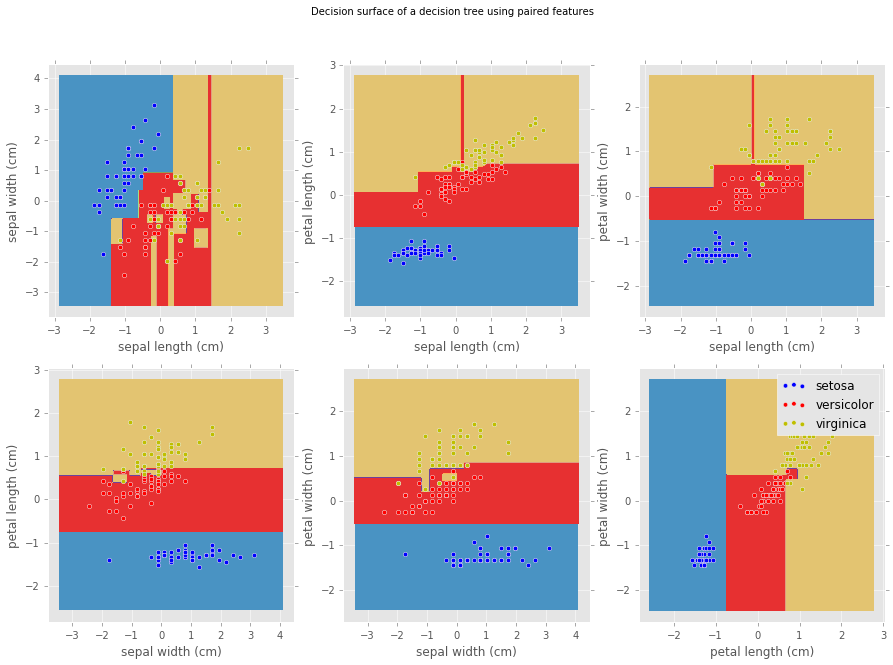

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
plt.rcParams["figure.figsize"] = [15,10]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Регрессия с деревьями решений

В этом случае всё очень похоже, с той разницой, что мы будем пытаться уменьшить среднюю квадратичную ошибку
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

In [19]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

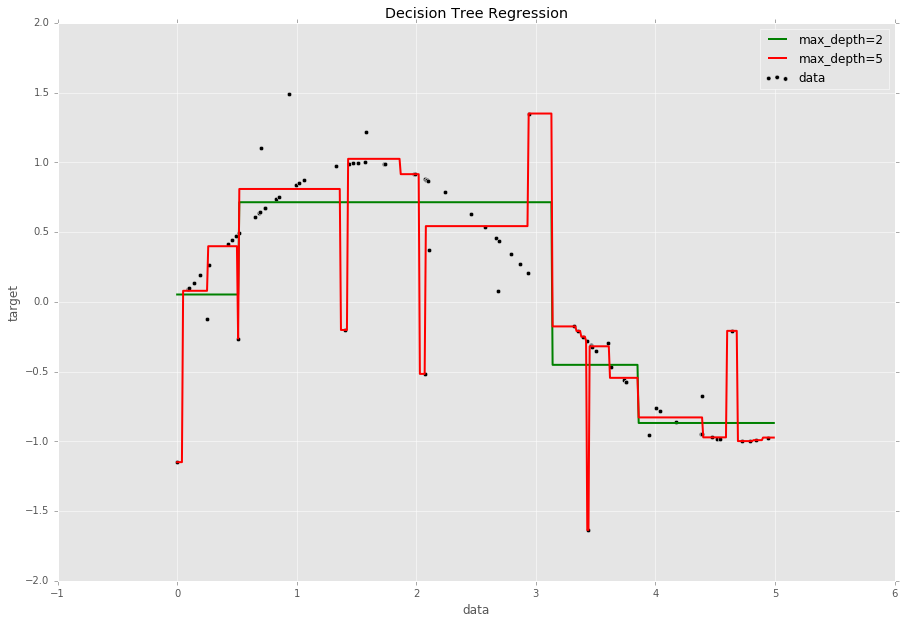

In [20]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Перейдем к заданию

дедлайн: 20.05.16

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [158]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [159]:
data = pd.read_csv('california.dat')


In [160]:
# делим выборку на train-test
train,test=train_test_split(data,train_size =0.7)
e_trn,e_tst=[],[]


In [161]:
y_train=train['MedianHouseValue']
x_train = train[['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'MedianIncome']]
y_test=test['MedianHouseValue']
x_test=test[['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'MedianIncome']]

In [162]:
for i in range(1, 31):
    r = tree.DecisionTreeRegressor(max_depth=i)
    r.fit(x_train, y_train)
    ts1 = r.predict(x_test)
    tr1 = r.predict(x_train)
    e_tst.append(mean_squared_error(ts1, y_test))
    e_trn.append(mean_squared_error(tr1, y_train))
 
    

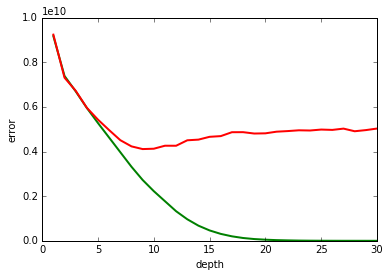

In [163]:

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
n=[x for x in range(1,31)]
plt.plot(n,e_trn, c="g", label="train", linewidth=2)
plt.plot(n,e_tst, c="r", label="test", linewidth=2)
plt.xlabel("depth")
plt.ylabel("error")

plt.show()


In [164]:
print(np.argmin(e_trn)+1,'оптим. глубина для тренировочной выборки')
print(np.argmin(e_tst)+1,'оптим. глубина для тестовой выборки')

30 оптим. глубина для тренировочной выборки
9 оптим. глубина для тестовой выборки


**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [165]:
data.columns.tolist()[:8]

['Longitude',
 'Latitude',
 'HousingMedianAge',
 'TotalRooms',
 'TotalBedrooms',
 'Population',
 'Households',
 'MedianIncome']

In [166]:
pd.DataFrame({'Feature': ['Longitude',
 'Latitude',
 'HousingMedianAge',
 'TotalRooms',
 'TotalBedrooms',
 'Population',
 'Households',
 'MedianIncome'], 'Importance': tree.DecisionTreeRegressor().fit(x_train, y_train).feature_importances_})

,Feature,Importance
0,Longitude,0.157487
1,Latitude,0.172889
2,HousingMedianAge,0.063717
3,TotalRooms,0.022448
4,TotalBedrooms,0.023796
5,Population,0.030573
6,Households,0.018583
7,MedianIncome,0.510506


**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

1) Обработки пропусков данных:

  На стадии обучения: если объект не подходит для вычисления предиката β(x), тогда он не учитывается(удаляется из выборки), этот метод чаще используется в случае больших датасетов.
Но также мы знаем информацию о том, насколько частно объекты во внутренней вершине уходят в левое и правое поддеревья. Следовательно, мы можем вычислить эти оценки вероятностей правой и левой ветвей. Оценив, мы получаем условную вероятность(т.е. функцию) попасть в правое или левое поддеревья для объекта Х, дошедшего до рассматриваемого узла.
Так мы можем высчитать верятности для каждой внутренней листовой вершины на этапе обучения.
  На стадии классификации:мы пропускаем объект через решающее дерево до тех пор, пока не столкнемся с проблемой невозможности вычисления предиката. Столкнувшись с ней, мы пропускаем объект дальше в левое или правые дочерние поддеревья в зависимости от вычисленных зачений условной вероятности класса для объекта. Там, где вероятность будет больше, туда и отправится объект.

   Если же значение предиката в вершине мы знаем, то считаем оценки условных вероятностей классов непосредественно из левой или правой дочерней части дерева. Вычислив значения вероятности классов для объекта в каждой вершине дерева, в итоге мы можем вычислить рекурсивно вероятности классов в корневой вершнине. Затем мы относим объект к тому классу, где вероятность наибольшая (принцип максимума апостреиорной информации)
   
Информация взята из лекции №8 курса "Знакомство с анализом данных и машинным обучением" на coursera.org

2) Как сделать разделяющие плоскости непараллельные осям?

   Нужно проверять в каждой вершине более одного признака. Например, для того, чтобы аппроксимировать прямую X+Y=8, мы получаем дерево, состоящее из одной вершины и двух листьев. Пусть вершина тестрирует условие X+Y < 8, при его выполнении ставится признак "-", в обратном случае - "+". В данном случае разделяющая плоскость не будет параллельная осям.
   
Информация взята из статьи http://download.springer.com/static/pdf/598/art%253A10.1023%252FA%253A1022607123649.pdf?originUrl=http%3A%2F%2Flink.springer.com%2Farticle%2F10.1023%2FA%3A1022607123649&token2=exp=1463776610~acl=%2Fstatic%2Fpdf%2F598%2Fart%25253A10.1023%25252FA%25253A1022607123649.pdf%3ForiginUrl%3Dhttp%253A%252F%252Flink.springer.com%252Farticle%252F10.1023%252FA%253A1022607123649*~hmac=e2eb54f3ef707db72d795742b71121e515937151d2d4aaf7fc3dbdab7fc17159   

